In [1]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# params
N = 1000
F = N
size=100

In [3]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (2,4))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator2(F, size, cor, (4,6), (1,1))

In [4]:
%%timeit
fg = gamma_wrapper(0)

30.4 ms ± 8.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

70.3 ms ± 36.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
fm = mn_wrapper(0)


41.8 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

64.5 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

calc(gamma_wrapper, 0.5)

(0.4718093389626893, 605264.6753277526)

In [9]:
cor_rng = np.arange(0, 1.01, 0.05)

In [10]:
%%time
repeats = 100
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga, l_ga= calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga, l_ga))

CPU times: user 13min 18s, sys: 12min 54s, total: 26min 12s
Wall time: 3min 38s


In [11]:
%%time
repeats = 100
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn, l_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn, l_mn))

CPU times: user 12min 11s, sys: 11min 29s, total: 23min 41s
Wall time: 3min 17s


In [12]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual', 'load'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual', 'load'])

In [13]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})

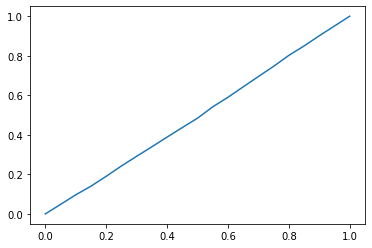

In [14]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

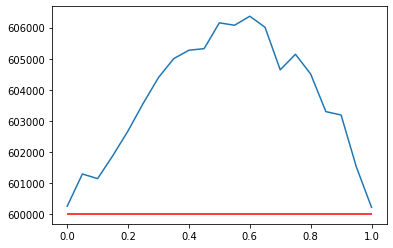

In [15]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, grped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

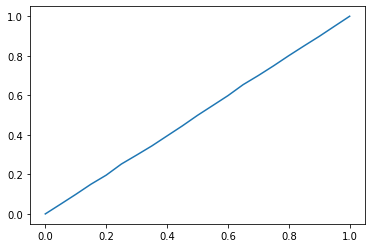

In [16]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

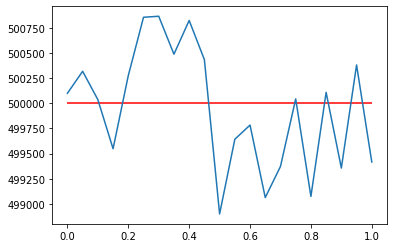

In [17]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, mnped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

In [18]:
grped

actual                           load                   
              mean count       std           mean count          std
expected                                                            
0.00      0.000241   100  0.000147  600245.623017   100  3695.176184
0.05      0.048348   100  0.006142  601286.254446   100  4065.943309
0.10      0.096830   100  0.012592  601136.206568   100  4053.945069
0.15      0.140533   100  0.016013  601877.195896   100  4020.174296
0.20      0.190372   100  0.019635  602674.195419   100  3996.890825
0.25      0.242724   100  0.024356  603563.817883   100  4141.769680
0.30      0.291500   100  0.027791  604392.446132   100  3912.431918
0.35      0.339573   100  0.025827  605000.140702   100  3816.105638
0.40      0.388644   100  0.030281  605272.113154   100  4751.553306
0.45      0.436862   100  0.032108  605323.396297   100  5009.383676
0.50      0.484250   100  0.030141  606154.423721   100  4251.850851
0.55      0.541590   100  0.030465  606076.589360   100  4265.059638
0.60      0.589964   100  0.031065  606366.490877   100  4687.061180
0.65      0.642620   100  0.023597  606012.868266   100  4209.480278
0.70      0.694916   100  0.027512  604640.720661   100  4693.335872
0.75      0.746454   100  0.016981  605141.918872   100  4841.344849
0.80      0.801835   100  0.013140  604505.973688   100  4133.891927
0.85      0.849418   100  0.011834  603294.311197   100  3989.023382
0.90      0.901185   100  0.006019  603185.598437   100  4234.556233
0.95      0.950417   100  0.002336  601517.149258   100  4233.690897
1.00      0.999926   100  0.000099  600211.800033   100  4063.433877

In [19]:
mnped

actual                               load                    
              mean count           std           mean count           std
expected                                                                 
0.00      0.000257   100  1.501586e-04  500099.004717   100   1816.747231
0.05      0.049332   100  6.294349e-03  500317.941263   100   2772.635958
0.10      0.098945   100  1.177375e-02  500036.221844   100   3603.564332
0.15      0.150455   100  1.940109e-02  499547.793874   100   3935.827266
0.20      0.196182   100  2.064890e-02  500275.134321   100   4525.399089
0.25      0.252583   100  2.622788e-02  500855.156008   100   5378.965278
0.30      0.297807   100  2.722111e-02  500865.328199   100   5806.670280
0.35      0.344099   100  3.136768e-02  500487.955157   100   6160.940937
0.40      0.394709   100  3.323549e-02  500823.478563   100   5452.604727
0.45      0.445184   100  3.872531e-02  500433.854810   100   5865.809841
0.50      0.498632   100  3.710408e-02  498899.609090   100   7233.910224
0.55      0.548358   100  3.310354e-02  499641.816607   100   7025.261128
0.60      0.598297   100  3.111573e-02  499783.213871   100   8291.178073
0.65      0.654028   100  3.316353e-02  499062.209837   100   9153.090587
0.70      0.700262   100  3.159047e-02  499371.906822   100   8733.358247
0.75      0.749228   100  2.649241e-02  500043.351101   100   9032.915292
0.80      0.800593   100  2.415506e-02  499073.648441   100  10345.034918
0.85      0.849883   100  1.788898e-02  500108.400360   100   9405.591855
0.90      0.898147   100  1.279612e-02  499355.749277   100   9446.095103
0.95      0.949242   100  6.721565e-03  500380.791182   100  10290.790270
1.00      1.000000   100  1.183118e-09  499415.795275   100   9689.736453